In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
# Define the paths
dataset_path = '/home/cougarnet.uh.edu/tbahiru/Documents/data/'
csv_file = dataset_path + 'BalancedFace.csv'
images_path = dataset_path + 'BalancedFace/'

# Load the dataset
df = pd.read_csv(csv_file)

# Map file names to their respective paths
df['file_path'] = images_path + df['file']

# Split the dataset into training and validation sets
train_df, valid_df = train_test_split(df, test_size=0.2, random_state=42)

# Function to preprocess images
def preprocess_image(file_path, label):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = image / 255.0
    return image, label

# Function to create a dataset from a DataFrame
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    df = dataframe.copy()
    labels = df['gender'].map({'Male': 0, 'Female': 1}).values
    ds = tf.data.Dataset.from_tensor_slices((df['file_path'].values, labels))
    ds = ds.map(preprocess_image)
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
    return ds

2024-04-27 22:46:39.466988: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-27 22:46:40.587627: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-04-27 22:46:43.341458: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-27 22:46:43.639547: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. 

Epoch 1/10


I0000 00:00:1714276012.571115    3459 service.cc:145] XLA service 0x78ddf0008410 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1714276012.571147    3459 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-04-27 22:46:52.831699: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-27 22:46:53.435952: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1714276014.137169    3514 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1370', 32 bytes spill stores, 32 bytes spill loads

I0000 00:00:1714276014.187190    3504 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_4272', 40 bytes spill stores, 40 bytes spill loads

I0000 00:0

   6/2171 ━━━━━━━━━━━━━━━━━━━━ 52s 24ms/step - accuracy: 0.5053 - loss: 0.7625 

I0000 00:00:1714276019.232208    3459 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2168/2171 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6837 - loss: 0.5833

I0000 00:00:1714276069.616835    3606 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_4272', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1714276069.778587    3609 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_4272', 40 bytes spill stores, 40 bytes spill loads

I0000 00:00:1714276069.780912    3612 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_4272', 32 bytes spill stores, 32 bytes spill loads

I0000 00:00:1714276069.894815    3602 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1370', 252 bytes spill stores, 252 bytes spill loads



2171/2171 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6838 - loss: 0.5833

I0000 00:00:1714276086.278668    3715 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1159', 260 bytes spill stores, 260 bytes spill loads



2171/2171 ━━━━━━━━━━━━━━━━━━━━ 85s 33ms/step - accuracy: 0.6838 - loss: 0.5833 - val_accuracy: 0.7255 - val_loss: 0.5303
Epoch 2/10
2171/2171 ━━━━━━━━━━━━━━━━━━━━ 65s 27ms/step - accuracy: 0.7415 - loss: 0.5070 - val_accuracy: 0.7448 - val_loss: 0.5091
Epoch 3/10
2171/2171 ━━━━━━━━━━━━━━━━━━━━ 65s 27ms/step - accuracy: 0.7673 - loss: 0.4738 - val_accuracy: 0.7518 - val_loss: 0.4941
Epoch 4/10
2171/2171 ━━━━━━━━━━━━━━━━━━━━ 66s 27ms/step - accuracy: 0.7896 - loss: 0.4434 - val_accuracy: 0.7491 - val_loss: 0.5049
Epoch 5/10
2171/2171 ━━━━━━━━━━━━━━━━━━━━ 65s 27ms/step - accuracy: 0.8074 - loss: 0.4137 - val_accuracy: 0.7544 - val_loss: 0.4944
Epoch 6/10
2171/2171 ━━━━━━━━━━━━━━━━━━━━ 65s 26ms/step - accuracy: 0.8282 - loss: 0.3800 - val_accuracy: 0.7648 - val_loss: 0.4791
Epoch 7/10
2171/2171 ━━━━━━━━━━━━━━━━━━━━ 67s 27ms/step - accuracy: 0.8499 - loss: 0.3492 - val_accuracy: 0.7679 - val_loss: 0.4815
Epoch 8/10
2171/2171 ━━━━━━━━━━━━━━━━━━━━ 69s 27ms/step - accuracy: 0.8657 - loss: 0.32

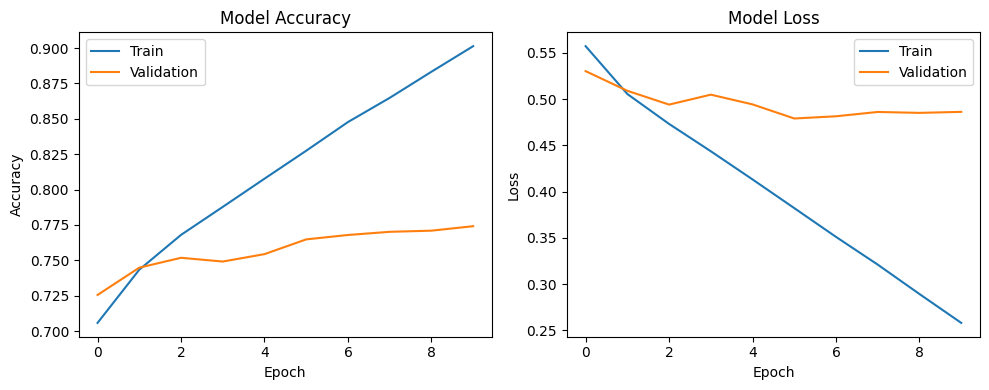

In [1]:
# Create training and validation datasets
train_dataset = df_to_dataset(train_df, shuffle=True, batch_size=32)
validation_dataset = df_to_dataset(valid_df, shuffle=False, batch_size=32)

### Step 2: Define and Compile the Model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the convolutional base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

### Step 3: Train the Model
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

### Step 4: Visualization and Saving the Model
# Plot training & validation accuracy values
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

model.save(dataset_path + 'my_model.h5')


2024-04-27 23:02:16.292642: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 6595534848 exceeds 10% of free system memory.
2024-04-27 23:02:22.067107: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 6595534848 exceeds 10% of free system memory.


343/343 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step
Overall Accuracy: 0.7686689793682673


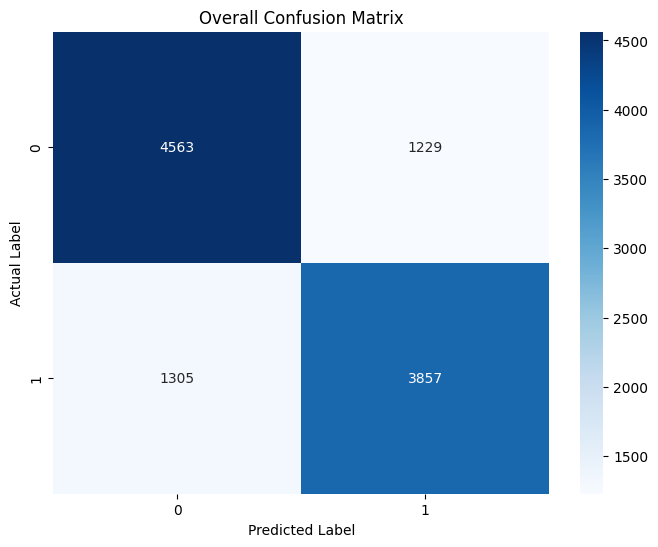

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 883ms/step
Accuracy for 3-9, East Asian, Male: 0.7226277372262774


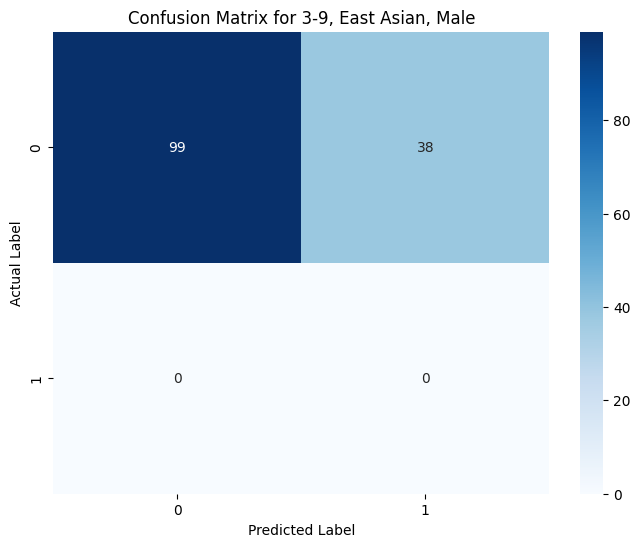

I0000 00:00:1714276962.906709    4754 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 260 bytes spill stores, 260 bytes spill loads



1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Accuracy for 50-59, East Asian, Female: 0.6666666666666666


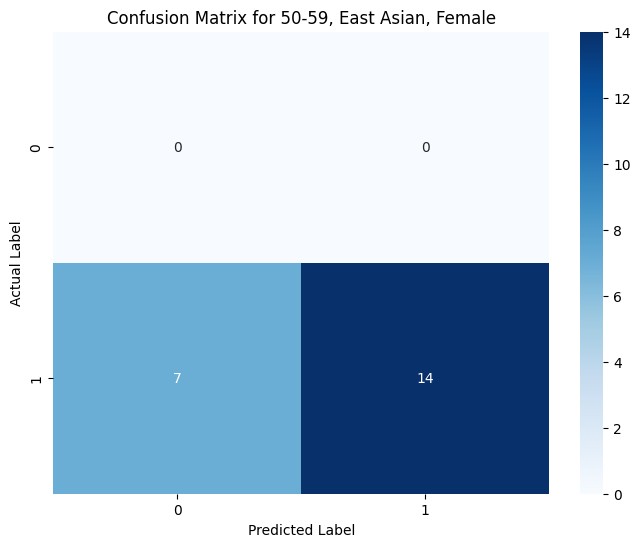

5/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

I0000 00:00:1714276967.852938    4810 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 24 bytes spill stores, 24 bytes spill loads



9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 436ms/step
Accuracy for 30-39, White, Male: 0.8244274809160306


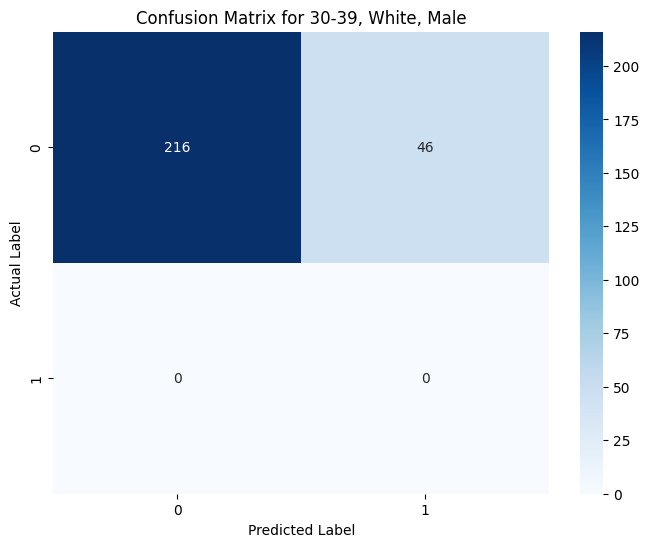

5/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

I0000 00:00:1714276972.112943    4868 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 260 bytes spill stores, 260 bytes spill loads



8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 633ms/step
Accuracy for 20-29, Latino_Hispanic, Female: 0.7951807228915663


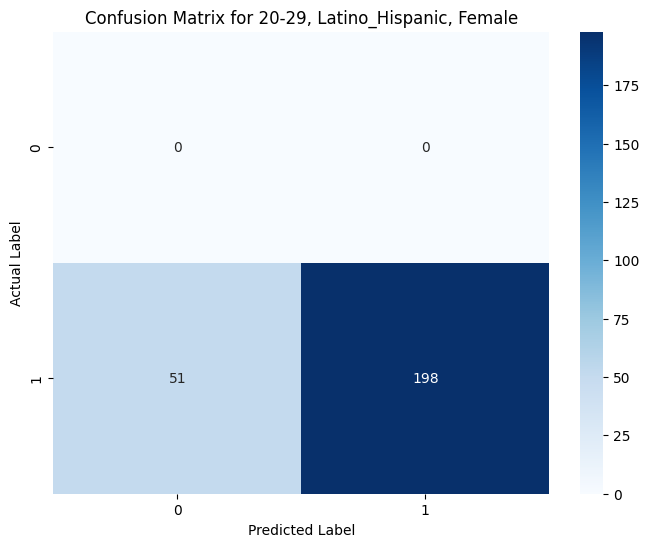

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step
Accuracy for 20-29, Southeast Asian, Male: 0.7272727272727273


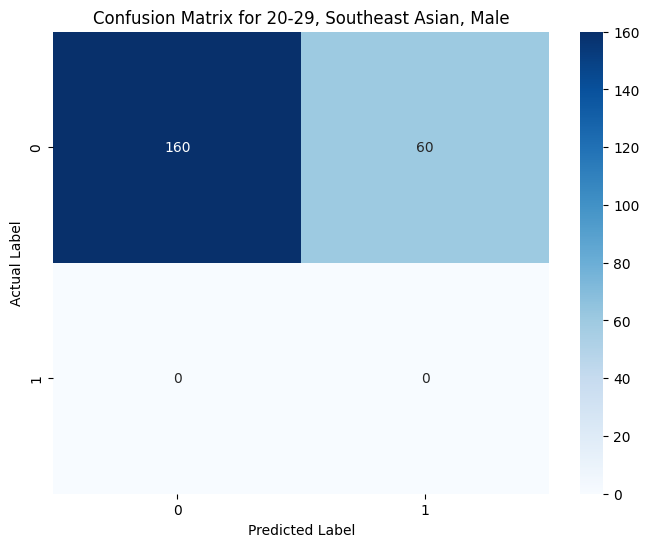

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

I0000 00:00:1714276978.648123    4961 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 8 bytes spill stores, 8 bytes spill loads



6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 752ms/step
Accuracy for 30-39, Latino_Hispanic, Male: 0.8448275862068966


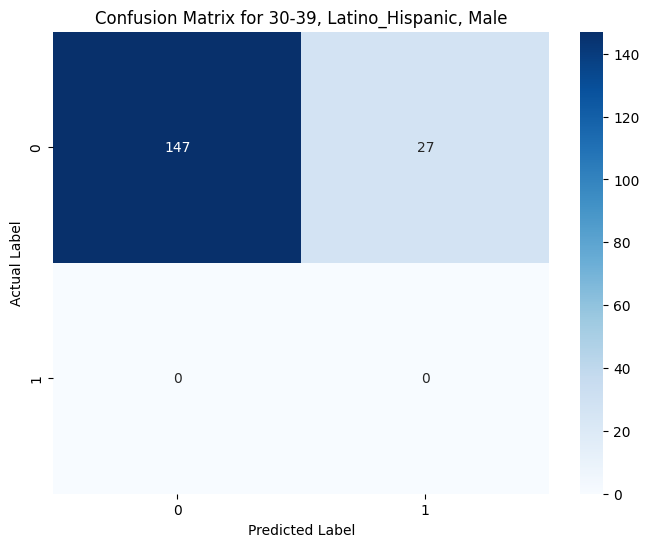

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy for 20-29, Black, Male: 0.772972972972973


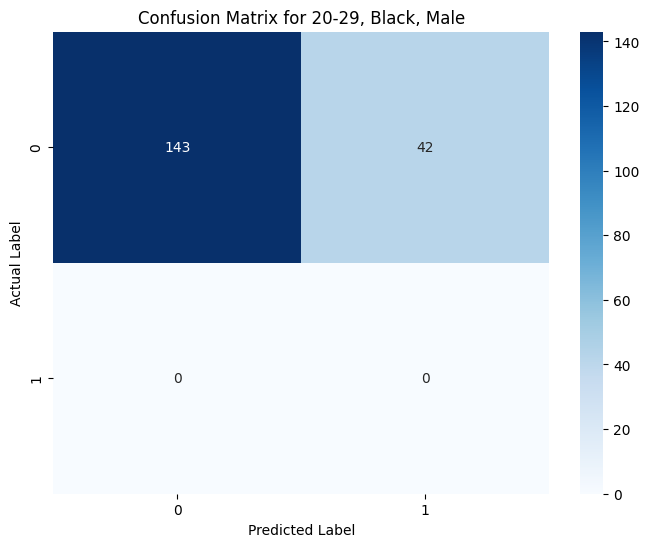

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Accuracy for 3-9, East Asian, Male: 0.7226277372262774


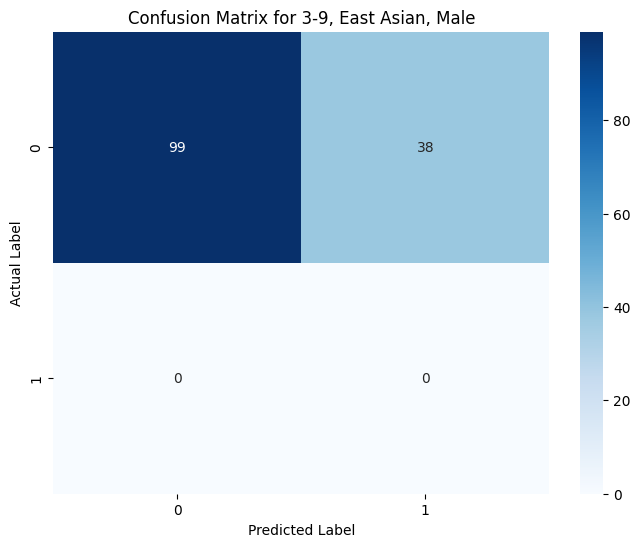

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy for 20-29, Southeast Asian, Male: 0.7272727272727273


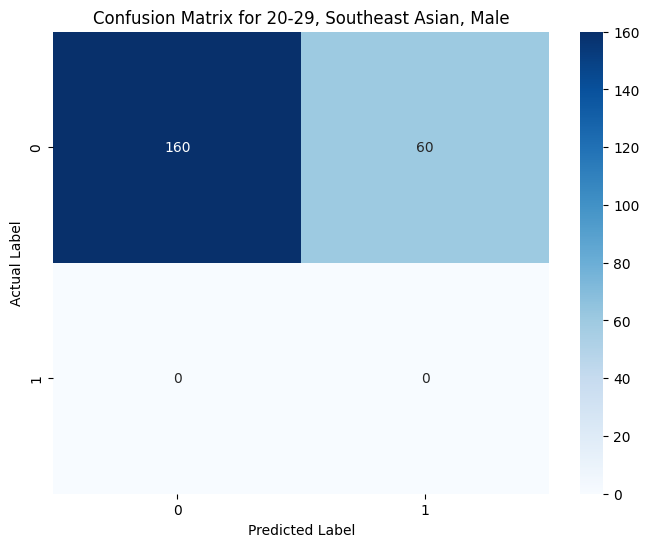

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

I0000 00:00:1714276984.902867    5084 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 260 bytes spill stores, 260 bytes spill loads



4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step 
Accuracy for 3-9, Southeast Asian, Male: 0.7610619469026548


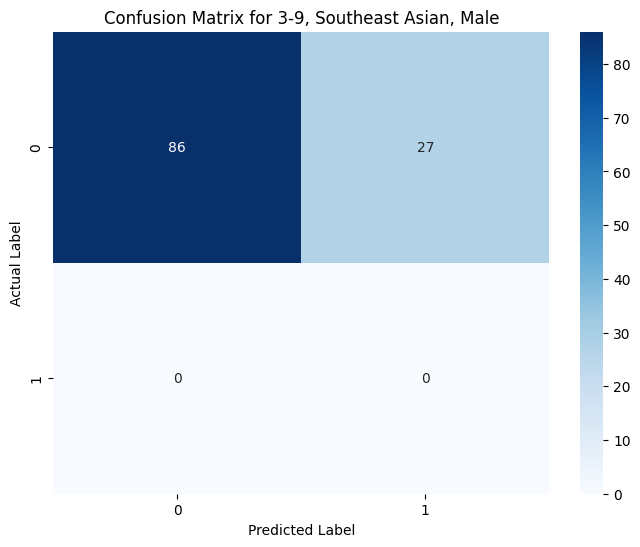

I0000 00:00:1714276988.945268    5141 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 8 bytes spill stores, 8 bytes spill loads



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Accuracy for more than 70, East Asian, Female: 0.42857142857142855


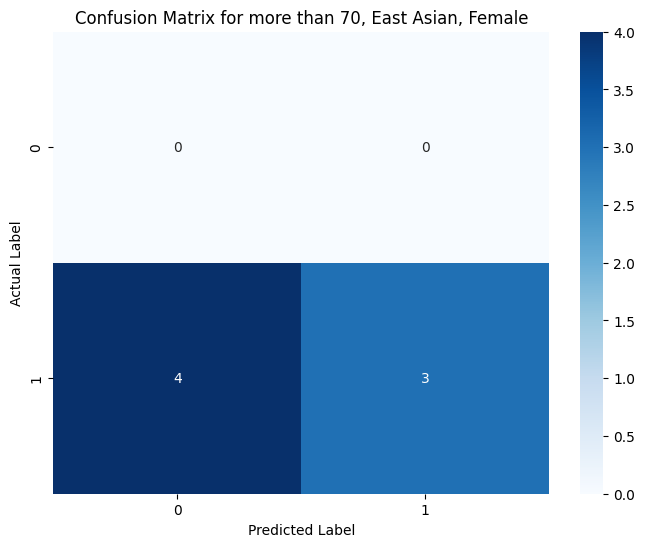

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Accuracy for 50-59, East Asian, Female: 0.6666666666666666


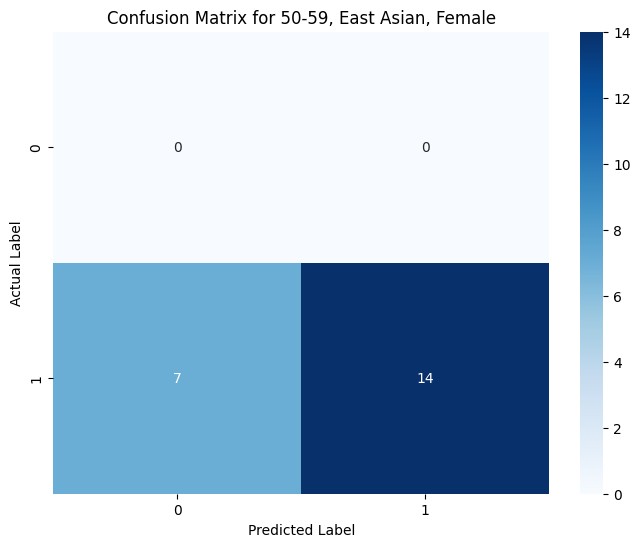

2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

I0000 00:00:1714276993.065994    5227 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 260 bytes spill stores, 260 bytes spill loads



3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step 
Accuracy for 40-49, Indian, Female: 0.7241379310344828


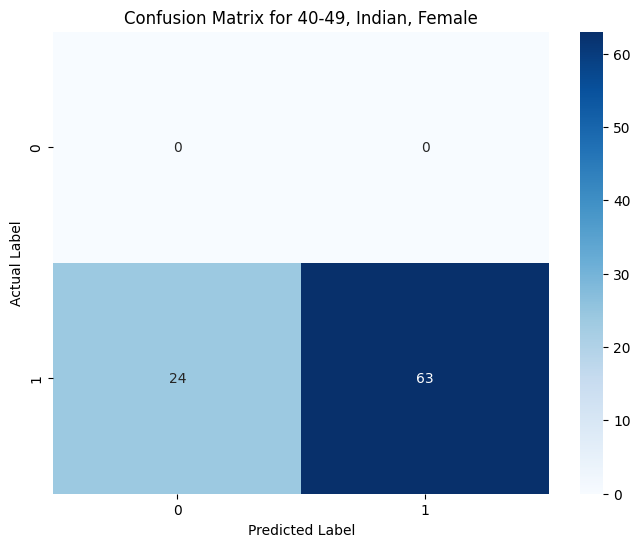

4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

I0000 00:00:1714276997.927165    5281 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 16 bytes spill stores, 16 bytes spill loads



6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 658ms/step
Accuracy for 20-29, Indian, Male: 0.8292682926829268


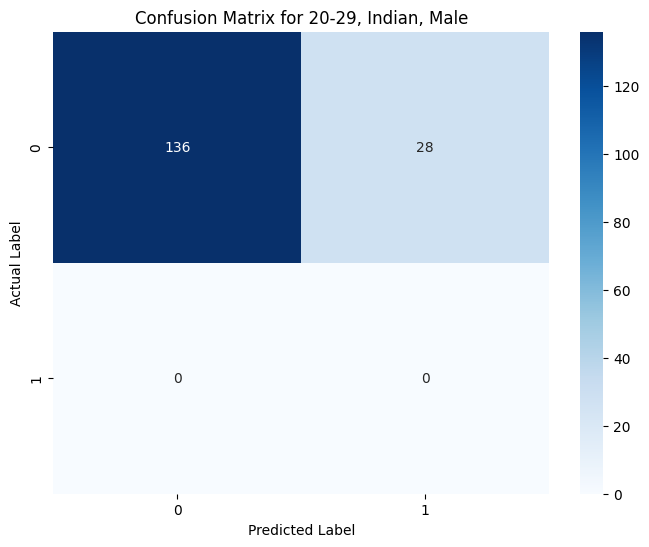

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy for 30-39, Latino_Hispanic, Female: 0.7469879518072289


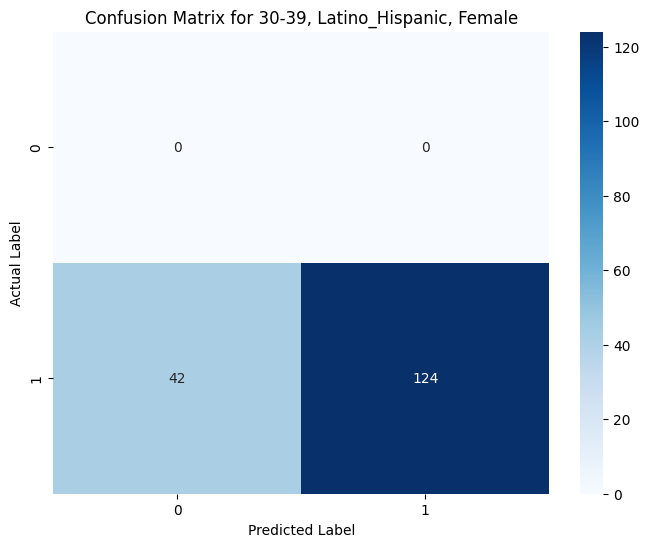

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Load the trained model
model = tf.keras.models.load_model(dataset_path + 'model.h5')

# Define paths for test data
test_csv_file = dataset_path + 'test.csv'
test_images_path = dataset_path + 'val/'

# Load test dataset
test_df = pd.read_csv(test_csv_file)
test_df['file_path'] = test_images_path + test_df['file']

# Preprocess test images
def preprocess_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = image / 255.0
    return image

# Prepare the test dataset
test_images = np.stack([preprocess_image(fp).numpy() for fp in test_df['file_path']])
test_labels = test_df['gender'].map({'Male': 0, 'Female': 1}).values

# Make predictions
predictions = model.predict(test_images)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Calculate overall accuracy
overall_accuracy = accuracy_score(test_labels, predicted_classes)
print("Overall Accuracy:", overall_accuracy)

# Confusion matrix for overall accuracy
cm = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Overall Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Process the first 15 intersectional attributes
for index, row in test_df.head(15).iterrows():
    group_df = test_df[(test_df['age'] == row['age']) & (test_df['race'] == row['race']) & (test_df['gender'] == row['gender'])]
    if not group_df.empty:
        group_images = np.stack([preprocess_image(fp).numpy() for fp in group_df['file_path']])
        group_labels = group_df['gender'].map({'Male': 0, 'Female': 1}).values
        group_predictions = model.predict(group_images)
        group_predicted_classes = (group_predictions > 0.5).astype(int).flatten()
        group_accuracy = accuracy_score(group_labels, group_predicted_classes)
        print(f"Accuracy for {row['age']}, {row['race']}, {row['gender']}: {group_accuracy}")

        # Confusion matrix for the group
        group_cm = confusion_matrix(group_labels, group_predicted_classes)
        plt.figure(figsize=(8, 6))
        sns.heatmap(group_cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {row["age"]}, {row["race"]}, {row["gender"]}')
        plt.ylabel('Actual Label')
        plt.xlabel('Predicted Label')
        plt.show()

2024-05-01 19:31:37.435045: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-01 19:31:38.507531: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-05-01 19:31:41.367557: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-01 19:31:41.672560: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. 

  8/343 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step

I0000 00:00:1714609951.066174    3367 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


343/343 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step
Overall Accuracy: 0.758900858134015


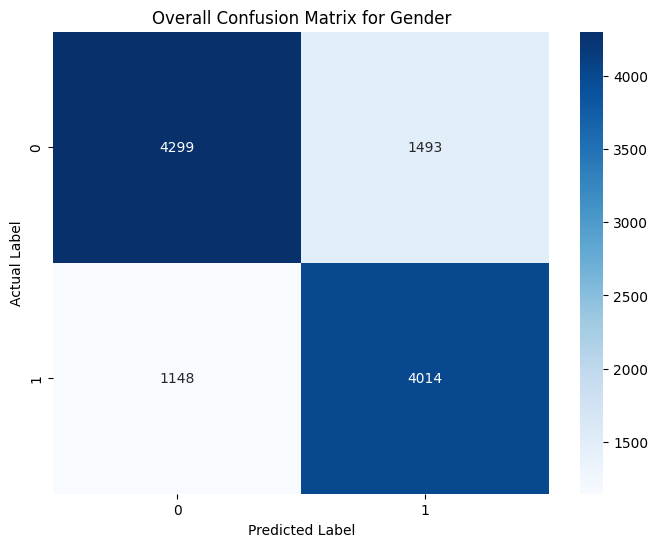

race             gender
Black            Female    0.649934
                 Male      0.758448
East Asian       Female    0.844761
                 Male      0.682111
Indian           Female    0.754915
                 Male      0.760956
Latino_Hispanic  Female    0.795181
                 Male      0.762926
Middle Eastern   Female    0.810606
                 Male      0.774908
Southeast Asian  Female    0.807353
                 Male      0.703401
White            Female    0.792316
                 Male      0.746881
dtype: float64
46/49 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

I0000 00:00:1714609965.446208    3532 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 260 bytes spill stores, 260 bytes spill loads



49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step


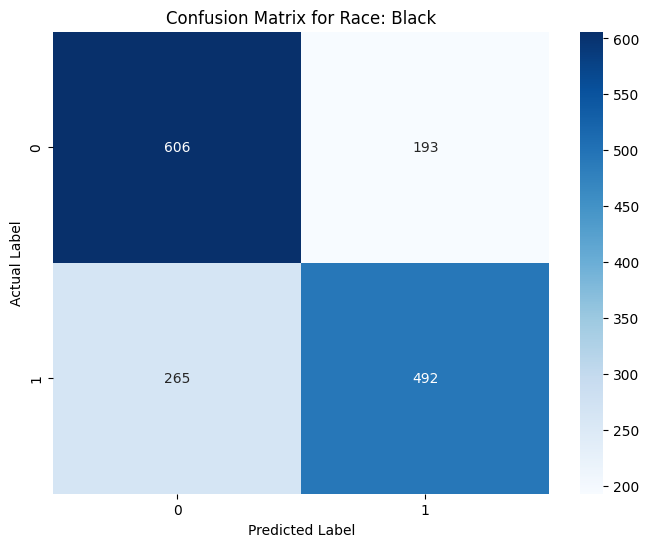

45/49 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

I0000 00:00:1714609972.477383    3589 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 8 bytes spill stores, 8 bytes spill loads



49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step


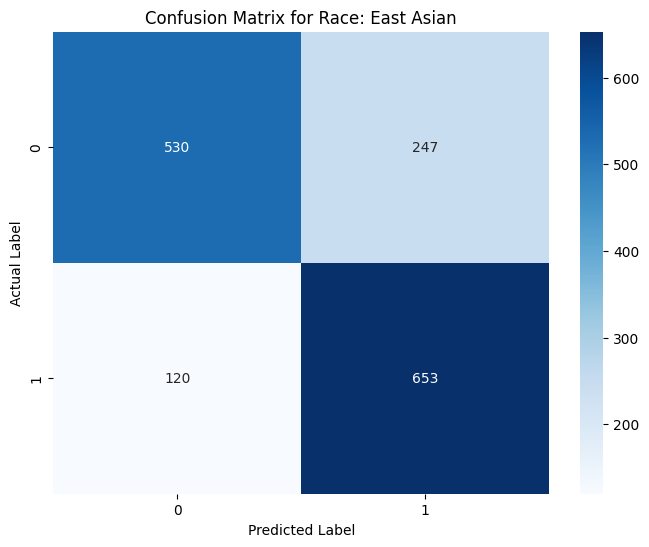

45/48 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

I0000 00:00:1714609979.489190    3648 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 8 bytes spill stores, 8 bytes spill loads



48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step


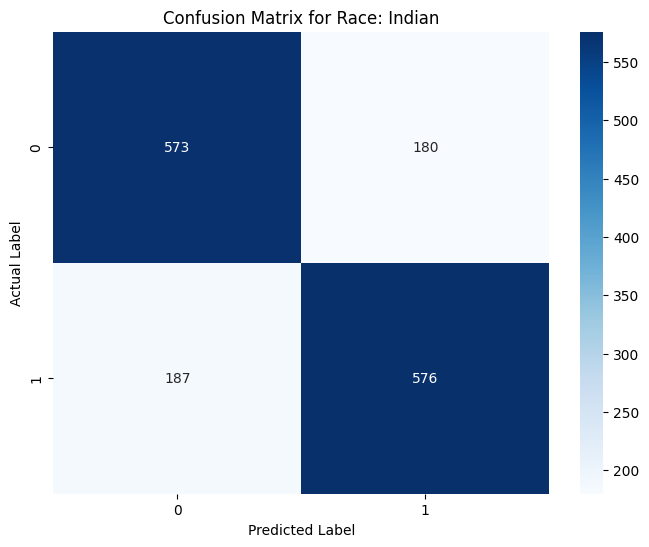

49/51 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

I0000 00:00:1714609986.521069    3713 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 260 bytes spill stores, 260 bytes spill loads



51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step


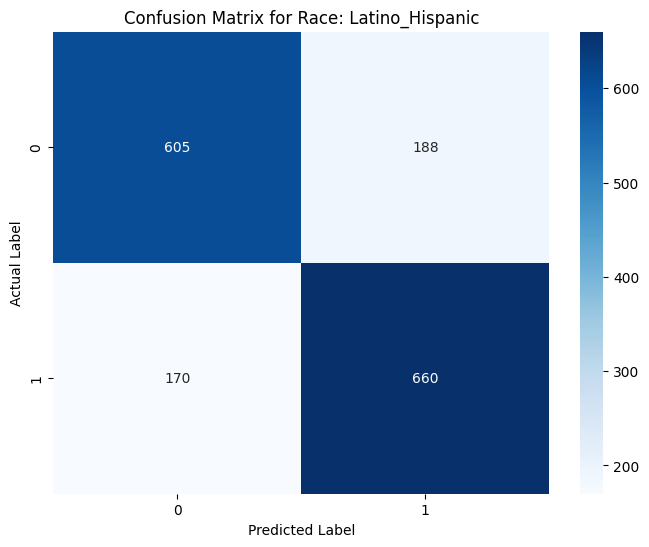

37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

I0000 00:00:1714609993.316318    3763 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 260 bytes spill stores, 260 bytes spill loads



38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step


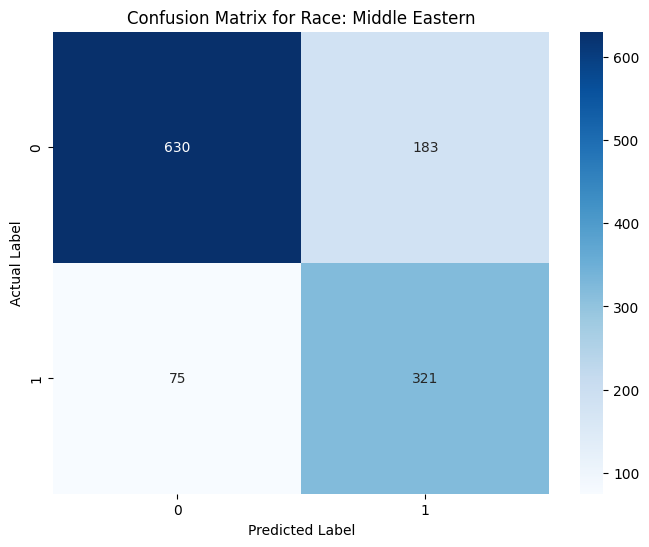

43/45 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

I0000 00:00:1714610000.533992    3830 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 8 bytes spill stores, 8 bytes spill loads



45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step


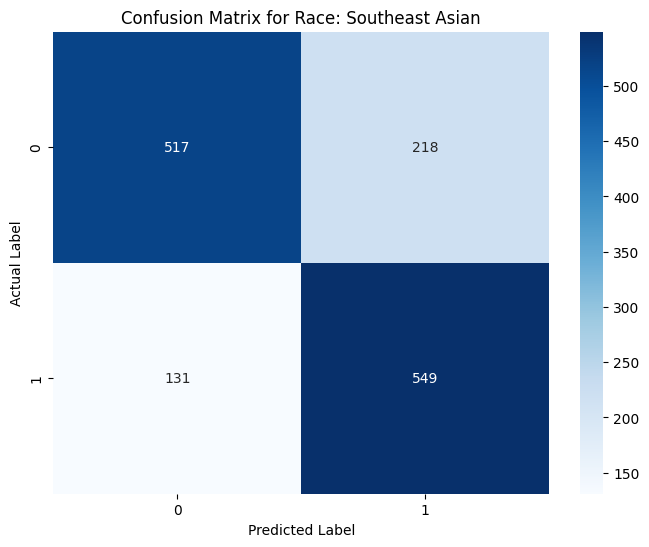

65/66 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

I0000 00:00:1714610008.052622    3889 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 20 bytes spill stores, 20 bytes spill loads



66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step


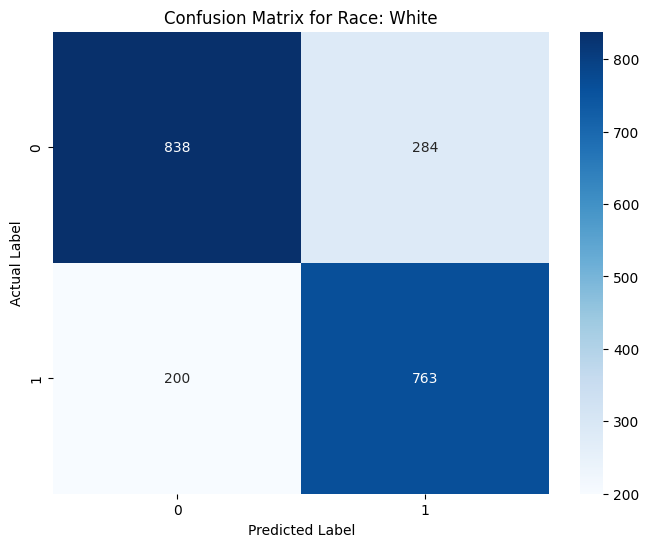

age
0-2             0.683417
10-19           0.699407
20-29           0.779697
3-9             0.662979
30-39           0.787554
40-49           0.787879
50-59           0.802764
60-69           0.775701
more than 70    0.762712
dtype: float64
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


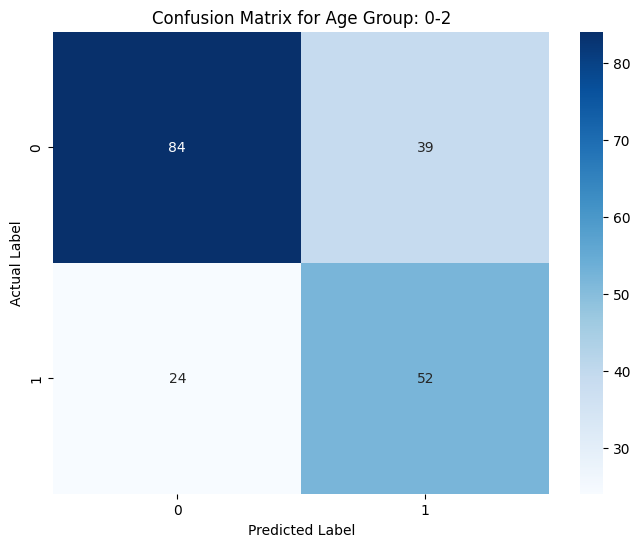

34/37 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

I0000 00:00:1714610014.552921    3967 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 236 bytes spill stores, 236 bytes spill loads



37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step


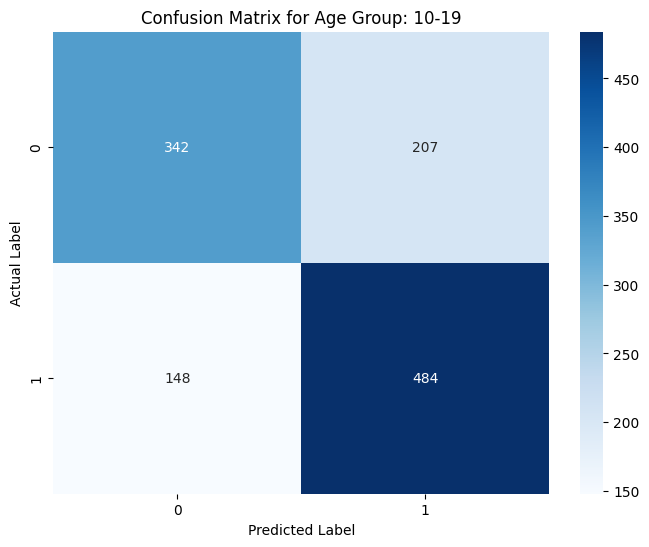

103/104 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

I0000 00:00:1714610027.859464    4027 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 16 bytes spill stores, 16 bytes spill loads



104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step


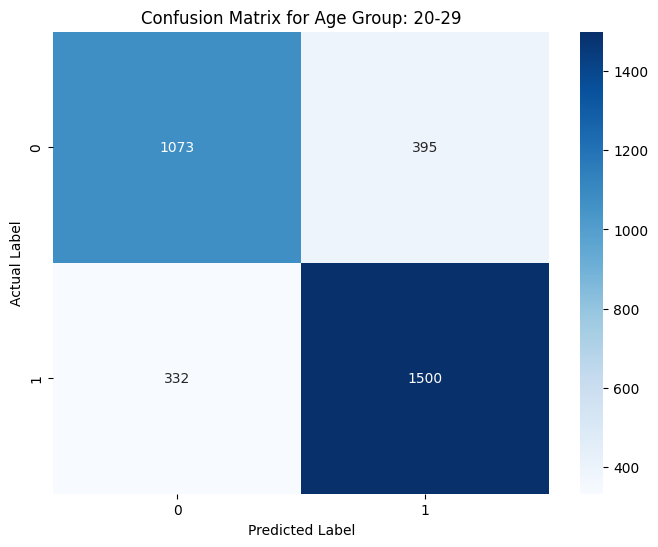

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


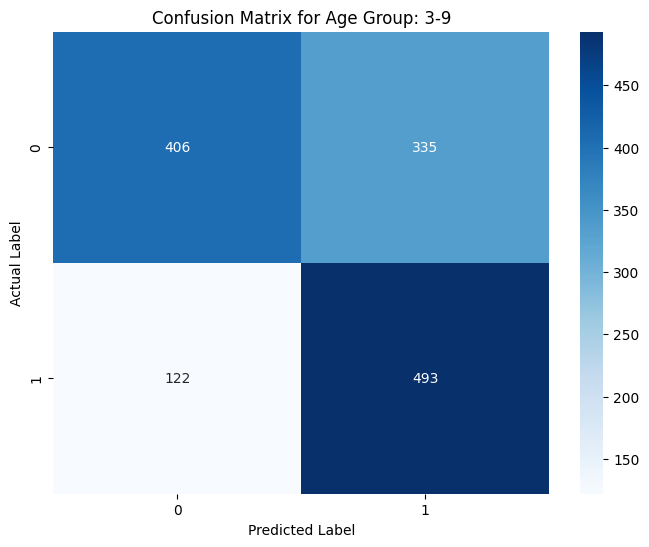

71/73 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

I0000 00:00:1714610040.078197    4093 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 224 bytes spill stores, 224 bytes spill loads



73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step


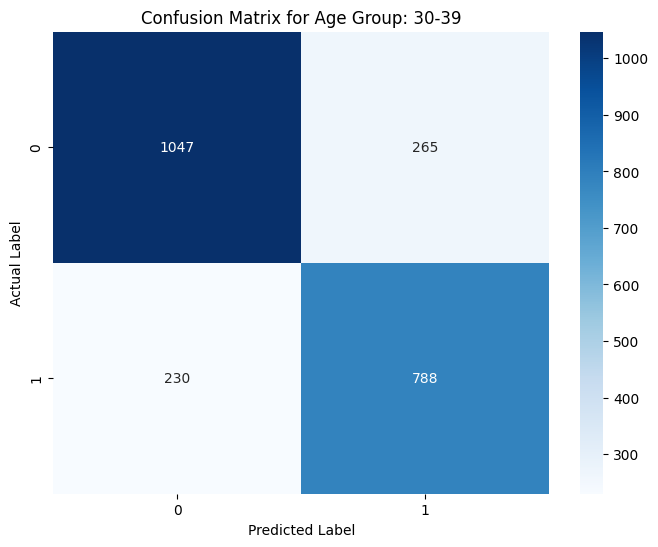

43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step


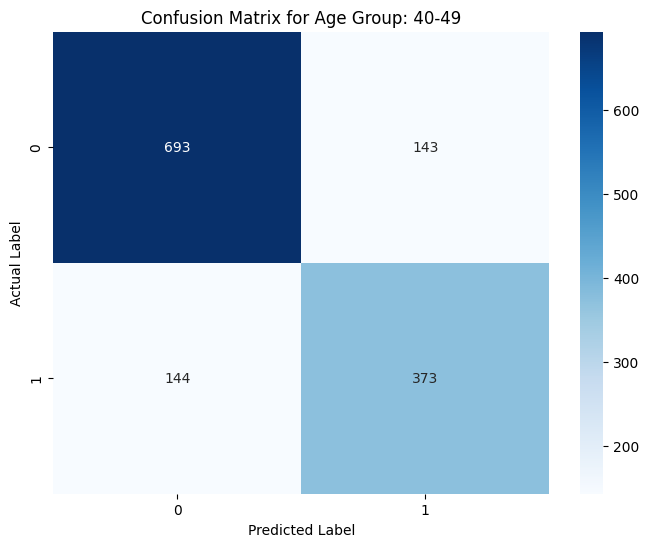

23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

I0000 00:00:1714610052.671155    4209 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 252 bytes spill stores, 252 bytes spill loads



25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 223ms/step


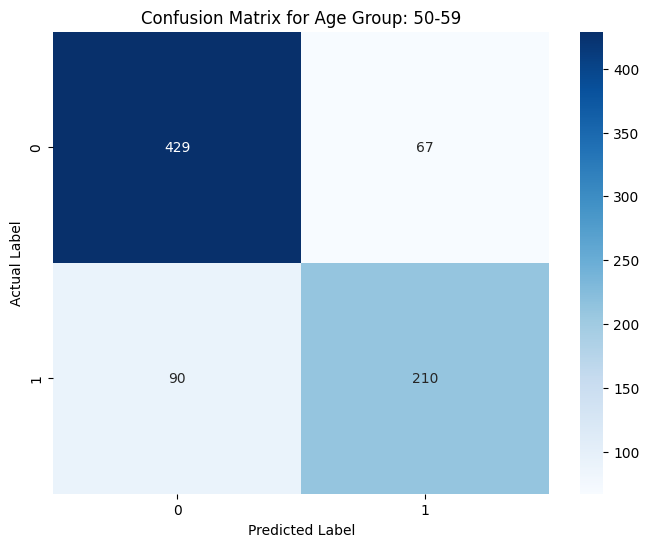

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 257ms/step


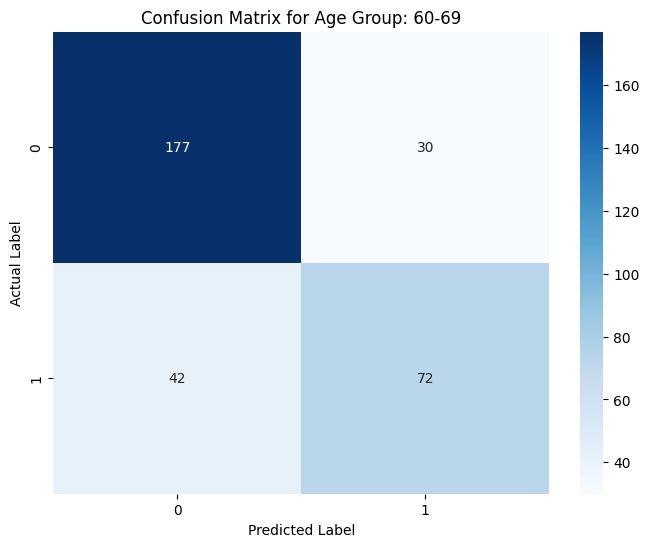

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

I0000 00:00:1714610061.306863    4319 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1150', 260 bytes spill stores, 260 bytes spill loads



4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step 


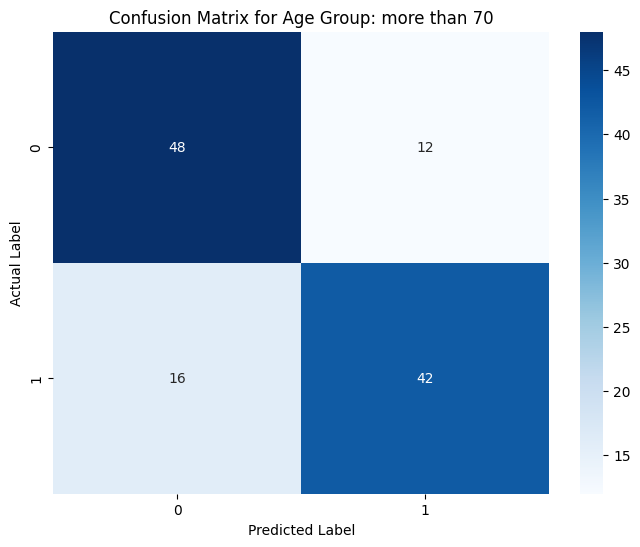

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Update the model path here
dataset_path = '/home/cougarnet.uh.edu/tbahiru/Documents/data/'

# Load the trained model
model = tf.keras.models.load_model(dataset_path + 'my_model.h5')

# Define paths for test data
test_csv_file = dataset_path + 'test.csv'
test_images_path = dataset_path + 'val/'

# Load test dataset
test_df = pd.read_csv(test_csv_file)
test_df['file_path'] = test_images_path + test_df['file']

# Preprocess test images
def preprocess_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = image / 255.0
    return image

# Prepare the test dataset
test_images = np.stack([preprocess_image(fp).numpy() for fp in test_df['file_path']])
test_labels = test_df['gender'].map({'Male': 0, 'Female': 1}).values

# Make predictions
predictions = model.predict(test_images)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Calculate overall accuracy and confusion matrix
overall_accuracy = accuracy_score(test_labels, predicted_classes)
print("Overall Accuracy:", overall_accuracy)

cm = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Overall Confusion Matrix for Gender')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Analyze accuracy by race and gender
race_gender_accuracy = test_df.copy()
race_gender_accuracy['predicted'] = predicted_classes
race_grouped = race_gender_accuracy.groupby(['race', 'gender']).apply(lambda x: accuracy_score(x['gender'].map({'Male': 0, 'Female': 1}), x['predicted']))
print(race_grouped)

# Confusion matrix for each race
for race, group_df in test_df.groupby('race'):
    group_images = np.stack([preprocess_image(fp).numpy() for fp in group_df['file_path']])
    group_labels = group_df['gender'].map({'Male': 0, 'Female': 1}).values
    group_predictions = model.predict(group_images)
    group_predicted_classes = (group_predictions > 0.5).astype(int).flatten()

    group_cm = confusion_matrix(group_labels, group_predicted_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(group_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for Race: {race}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Analyze accuracy by age group
age_accuracy = test_df.copy()
age_accuracy['predicted'] = predicted_classes
age_grouped = age_accuracy.groupby('age').apply(lambda x: accuracy_score(x['gender'].map({'Male': 0, 'Female': 1}), x['predicted']))
print(age_grouped)

# Confusion matrix for each age group
for age_group, group_df in test_df.groupby('age'):
    group_images = np.stack([preprocess_image(fp).numpy() for fp in group_df['file_path']])
    group_labels = group_df['gender'].map({'Male': 0, 'Female': 1}).values
    group_predictions = model.predict(group_images)
    group_predicted_classes = (group_predictions > 0.5).astype(int).flatten()

    group_cm = confusion_matrix(group_labels, group_predicted_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(group_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for Age Group: {age_group}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()
